# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':1.4,
    'stickiness_wi':5000,
    'stickiness_bt':5, # 100
    'sparsity':0.08,
    'pvar': 2,
    'lrate':0.8,
    'lratep':1,
} 
args = {
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str

'concentration_1.400-stickiness_wi_5000.000-stickiness_bt_5.000-sparsity_0.080-pvar_2.000-lrate_0.800-lratep_1.000'

### main

In [5]:
ns = 12
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([0.52083333, 0.52447917, 0.48489583, 0.4828125 , 0.48697917])

<BarContainer object of 5 artists>

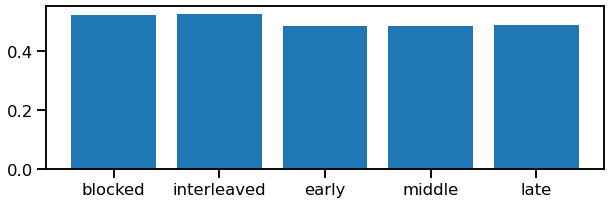

In [7]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)

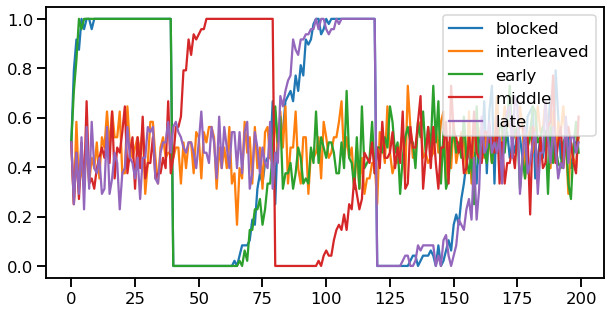

In [8]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()

# model state

In [9]:
curr_idx = 0
seed_idx = 0

In [10]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [11]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([5006.97795073, 5010.97795073, 5014.97795073, 5018.97795073,
       5022.97795073, 5026.97795073, 5030.97795073, 5034.97795073,
       5038.97795073, 5042.97795073, 5046.97795073, 5050.97795073,
       5054.97795073, 5058.97795073, 5062.97795073, 5066.97795073,
       5070.97795073, 5074.97795073, 5078.97795073, 5082.97795073,
       5086.97795073, 5090.97795073, 5094.97795073, 5098.97795073,
       5102.97795073, 5106.97795073, 5110.97795073, 5114.97795073,
       5118.97795073, 5122.97795073, 5126.97795073, 5130.97795073,
       5134.97795073, 5138.97795073, 5142.97795073, 5146.97795073,
       5150.97795073, 5154.97795073, 5158.97795073, 5162.97795073,
       5166.97795073, 5170.97795073, 5174.97795073, 5178.97795073,
       5182.97795073, 5186.97795073, 5190.97795073, 5194.97795073,
       5198.97795073, 5202.97795073, 5206.97795073, 5210.97795073,
       5214.97795073, 5218.97795073, 5222.97795073, 5226.97795073,
       5230.97795073, 5234.97795073, 5238.97795073, 5242.97795